In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# File to Load 
scores = Path("output_data/nfl.csv")

score_data = pd.read_csv(scores)

score_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [2]:
# Get the index of the 'team_favorite_id' column
favorite_id_index = score_data.columns.get_loc('team_favorite_id')

# Remove the 'favorite_win' column if it already exists
if 'favorite_win' in score_data.columns:
    score_data = score_data.drop('favorite_win', axis=1)

# Insert the 'favorite_win' column after the 'team_favorite_id' column
score_data.insert(favorite_id_index + 1, 'favorite_win', '')

# Iterate through each row in the DataFrame
for index, row in score_data.iterrows():
    score_home = row['score_home']
    score_away = row['score_away']
    team_home = row['team_home']
    team_away = row['team_away']
    team_favorite_id = row['team_favorite_id']
    
    # Compare scores and team names
    if score_home > score_away:
        if team_home == team_favorite_id:
            score_data.loc[index, 'favorite_win'] = 1
        else:
            score_data.loc[index, 'favorite_win'] = 0
    else:
        if team_away == team_favorite_id:
            score_data.loc[index, 'favorite_win'] = 1
        else:
            score_data.loc[index, 'favorite_win'] = 0

score_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,favorite_win,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,1,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,1,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,1,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,1,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,0,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,0,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,1,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,1,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,1,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [3]:
# Get the index of the 'favorite_win' column
favorite_win_index = score_data.columns.get_loc('favorite_win')

# Insert the 'home_win' column after the 'favorite_win' column
score_data.insert(favorite_win_index + 1, 'home_win', '')

# Iterate through each row in the DataFrame
for index, row in score_data.iterrows():
    score_home = row['score_home']
    score_away = row['score_away']
    
    # Compare scores and set 'home_win' value
    if score_home > score_away:
        score_data.loc[index, 'home_win'] = 1
    else:
        score_data.loc[index, 'home_win'] = 0
        
score_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,favorite_win,home_win,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,1,1,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,1,0,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,1,0,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,1,1,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,0,0,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,0,0,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,1,1,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,1,1,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,1,1,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [4]:
# Seperate columns needed
clean_score_data = score_data[["schedule_season", "schedule_week", "team_home", "score_home", "score_away", "team_away", "team_favorite_id", "favorite_win", "home_win"]].copy()

clean_score_data

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,favorite_win,home_win
0,2013,1,DEN,49,27,BAL,DEN,1,1
1,2013,1,BUF,21,23,NE,NE,1,0
2,2013,1,CAR,7,12,SEA,SEA,1,0
3,2013,1,CHI,24,21,CIN,CHI,1,1
4,2013,1,CLE,10,23,MIA,CLE,0,0
...,...,...,...,...,...,...,...,...,...
2702,2022,Division,BUF,10,27,CIN,BUF,0,0
2703,2022,Division,SF,19,12,DAL,SF,1,1
2704,2022,Conference,KC,23,20,CIN,KC,1,1
2705,2022,Conference,PHI,31,7,SF,PHI,1,1


In [5]:
# Export the score_data_filtered into a csv
clean_score_data.to_csv("output_data/nfl_favorite.csv")

In [6]:
# Calculate the sum of the column values
column_sum = clean_score_data['favorite_win'].sum()

# Calculate the average by dividing the sum by the number of rows
average = column_sum / len(clean_score_data) * 100

# Round the average to two decimal places
average_rounded = round(average, 2)

# Print the average with two decimal places
print("Average:", average_rounded)

Average: 65.79


In [7]:
# Calculate the sum of the column values
column_sum = clean_score_data['home_win'].sum()

# Calculate the average by dividing the sum by the number of rows
average2 = column_sum / len(clean_score_data) * 100

# Round the average to two decimal places
average2_rounded = round(average2, 2)

# Print the average with two decimal places
print("Average:", average2_rounded)

Average: 55.49


In [9]:
# Count the number of 0s in the 'favorite_win' column
count_one = clean_score_data['favorite_win'].value_counts()[1]

# Print the count
print("Count of 1s:", count_one)

Count of 1s: 1781


In [10]:
# Count the number of 0s in the 'favorite_win' column
count_zero = clean_score_data['favorite_win'].value_counts()[0]

# Print the count
print("Count of 0s:", count_zero)

Count of 0s: 926


In [11]:
# Underdog win percentage
average3 = count_zero / len(clean_score_data) * 100

# Round the average to two decimal places
average3_rounded = round(average3, 2)

# Print the average with two decimal places
print("Average:", average3_rounded)

Average: 34.21


In [12]:
# Count the number of 0s in the 'favorite_win' column
count_home = clean_score_data['home_win'].value_counts()[1]

# Print the count
print("Count of 1s:", count_home)

Count of 1s: 1502


In [13]:
# Rename multiple columns
clean_score_data = clean_score_data.rename(columns={'schedule_season': 'Season', "schedule_week": "Week", "team_home": "Home Team", "score_home": "Home Team Score", "score_away": "Away Team Score", "team_away": "Away Team", "team_favorite_id": "Favoured Team", "favorite_win": "Favoured Winner", "home_win": "Home Winner"})

# Display the updated DataFrame
clean_score_data

,Season,Week,Home Team,Home Team Score,Away Team Score,Away Team,Favoured Team,Favoured Winner,Home Winner
0,2013,1,DEN,49,27,BAL,DEN,1,1
1,2013,1,BUF,21,23,NE,NE,1,0
2,2013,1,CAR,7,12,SEA,SEA,1,0
3,2013,1,CHI,24,21,CIN,CHI,1,1
4,2013,1,CLE,10,23,MIA,CLE,0,0
...,...,...,...,...,...,...,...,...,...
2702,2022,Division,BUF,10,27,CIN,BUF,0,0
2703,2022,Division,SF,19,12,DAL,SF,1,1
2704,2022,Conference,KC,23,20,CIN,KC,1,1
2705,2022,Conference,PHI,31,7,SF,PHI,1,1


In [14]:
# Calculate the total number of Favoured Winners
week_fave = clean_score_data.groupby(['Week', 'Season'], sort=True)['Favoured Winner','Home Winner'].sum().reset_index()

week_fave

C:\Users\dario\AppData\Local\Temp\ipykernel_16420\972118280.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  week_fave = clean_score_data.groupby(['Week', 'Season'], sort=True)['Favoured Winner','Home Winner'].sum().reset_index()


,Week,Season,Favoured Winner,Home Winner
0,1,2013,12,9
1,1,2014,9,10
2,1,2015,10,10
3,1,2016,10,7
4,1,2017,9,7
...,...,...,...,...
207,Wildcard,2018,1,1
208,Wildcard,2019,1,1
209,Wildcard,2020,4,2
210,Wildcard,2021,5,5


In [15]:
# Group required data
week_count = clean_score_data.groupby(['Season', 'Week']).count()['Home Team'].reset_index()

In [16]:
# Rename necessary column
week_count.rename(columns = {'Home Team': 'Week Count'}, inplace = True)

week_count

,Season,Week,Week Count
0,2013,1,16
1,2013,10,14
2,2013,11,15
3,2013,12,14
4,2013,13,16
...,...,...,...
207,2022,9,13
208,2022,Conference,2
209,2022,Division,4
210,2022,Superbowl,1


In [17]:
# Create final DataFrame 
final_chart = pd.merge(week_fave, week_count, how = 'left', on = ['Season', 'Week'])

final_chart

,Week,Season,Favoured Winner,Home Winner,Week Count
0,1,2013,12,9,16
1,1,2014,9,10,16
2,1,2015,10,10,16
3,1,2016,10,7,16
4,1,2017,9,7,15
...,...,...,...,...,...
207,Wildcard,2018,1,1,4
208,Wildcard,2019,1,1,4
209,Wildcard,2020,4,2,6
210,Wildcard,2021,5,5,6


In [18]:
# Export the final_chart into a csv
final_chart.to_csv("output_data/final_data.csv", index = False)

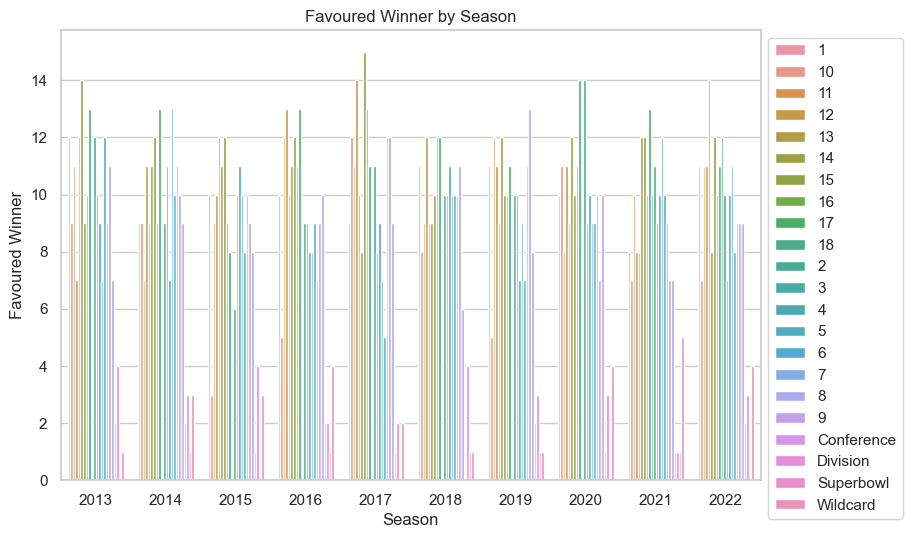

In [24]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=final_chart, x="Season", y="Favoured Winner", hue="Week")

plt.title("Favoured Winner by Season")  # Add the title here

# Adjust legend position
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust the margins to make room for the full chart
plt.subplots_adjust(bottom=0.15, right=0.8, top=0.9, left=0.1)  # Modify the margins as needed

# Save the figure
plt.savefig("images/favoured.png")

# Display the plot
plt.show()

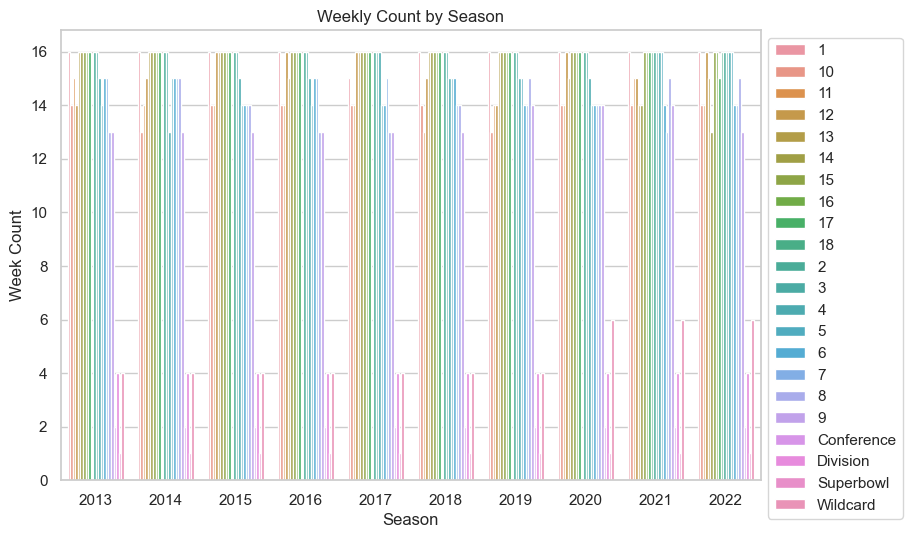

In [23]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=final_chart, x="Season", y="Week Count", hue="Week")

plt.title("Weekly Count by Season")  # Add the title here

# Adjust legend position
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust the margins to make room for the full chart
plt.subplots_adjust(bottom=0.15, right=0.8, top=0.9, left=0.1)  # Modify the margins as needed

# Save the figure
plt.savefig("images/weekcount.png")

# Display the plot
plt.show() 

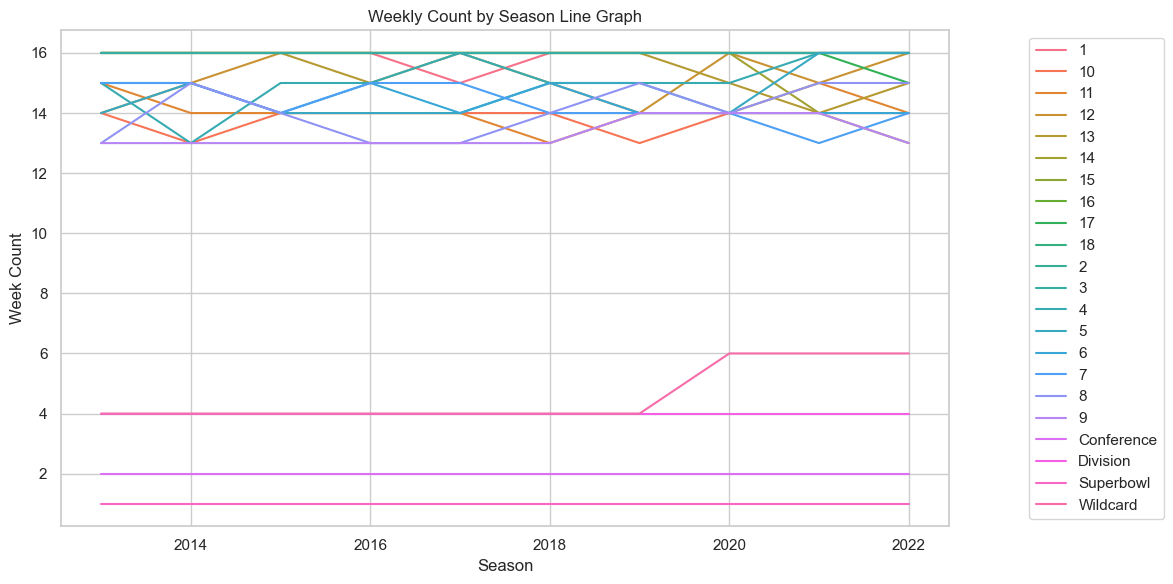

In [22]:
plt.figure(figsize=(12, 6))  # Increase the figure size as needed

sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.lineplot(data=final_chart, x="Season", y="Week Count", hue="Week")

plt.title("Weekly Count by Season Line Graph")  # Add the title here

# Adjust legend position
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

# Adjust the plot's padding
plt.tight_layout()

# Save the figure
plt.savefig("images/linevisualization.png")

# Display the plot
plt.show()